# Exploratory Data Analysis and Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

# Add the project directory to Python's path
project_path = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_path not in sys.path:
    sys.path.append(project_path)

# Verify the path addition
print("Project path added to sys.path:", project_path)


Project path added to sys.path: C:\Users\yafa917\OneDrive - HP Inc\Documents\GitHub\Time Series Prediction\time_series_prediction_energy


In [2]:
# Load data
data = pd.read_csv("../data/raw/energydata_complete.csv") 
print('Shape of Data:', data.shape)


Shape of Data: (19735, 29)


In [3]:
print('Column Names:', data.columns)
print('Data Types:\n', data.dtypes)

# Display first few rows
data.head()

Column Names: Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')
Data Types:
 date            object
Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
rv1            float64
rv2            float64
dtype: ob

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


## Handle Missing Values
Identify and handle missing values.

In [4]:
# Check missing values
missing_values = data.isnull().sum()
print('Missing Values:\n', missing_values)

# Drop or Fill Missing Values
data = data.dropna() 

Missing Values:
 date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64


## Summary Statistics


In [5]:
print('Summary Statistics:\n', data.describe())

Summary Statistics:
          Appliances        lights            T1          RH_1            T2  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      97.694958      3.801875     21.686571     40.259739     20.341219   
std      102.524891      7.935988      1.606066      3.979299      2.192974   
min       10.000000      0.000000     16.790000     27.023333     16.100000   
25%       50.000000      0.000000     20.760000     37.333333     18.790000   
50%       60.000000      0.000000     21.600000     39.656667     20.000000   
75%      100.000000      0.000000     22.600000     43.066667     21.500000   
max     1080.000000     70.000000     26.260000     63.360000     29.856667   

               RH_2            T3          RH_3            T4          RH_4  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      40.420420     22.267611     39.242500     20.855335     39.026904   
std        4.069813      2.006

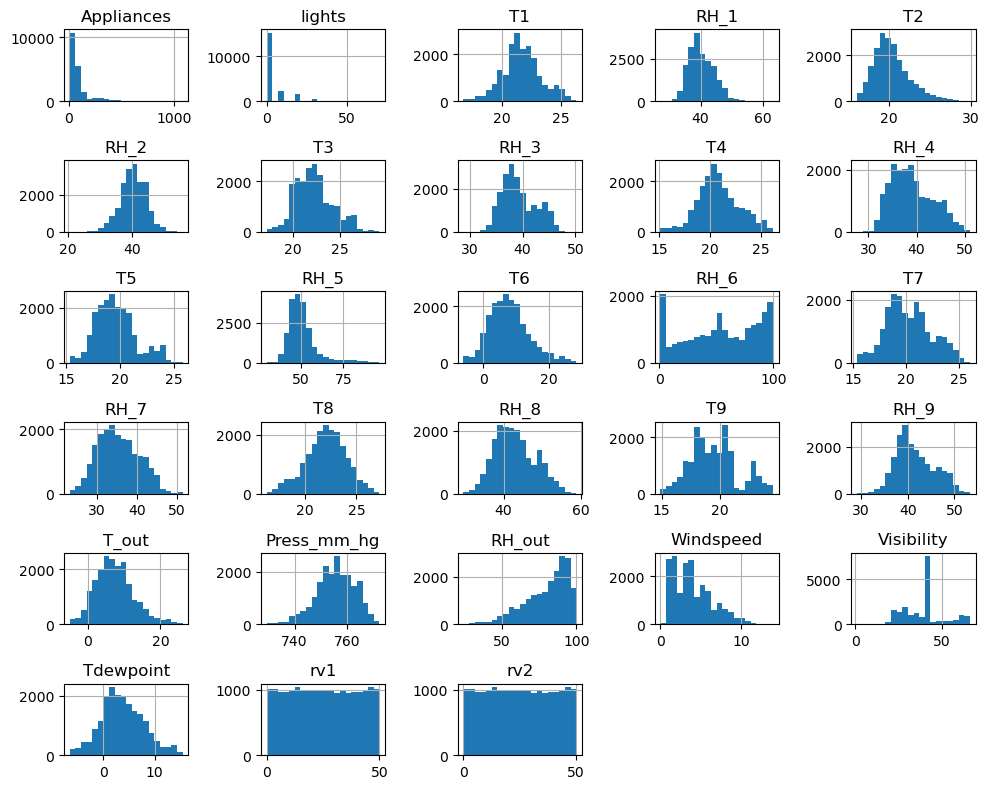

In [6]:
# Plot distributions for numeric columns
numeric_columns = data.select_dtypes(include="number")
numeric_columns.hist(figsize=(10, 8), bins=20)
plt.tight_layout()
plt.show()

## Process Time Column
Convert to datetime format, and sort data.

In [7]:
data['date'] = pd.to_datetime(data['date'])
data = data.sort_values(by='date')
data.set_index('date', inplace=True)
data.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [8]:
# Truncate from the top to start at 00:00
# Ensure the index is sorted by time
data = data.sort_index()

# Find the first timestamp with 00:00:00
start_time = data.index[data.index.time == pd.Timestamp('00:00:00').time()][0]

# Truncate the data from this timestamp
data = data.loc[start_time:]
data.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-12 00:00:00,40,10,21.39,44.560000,20.790000,43.863333,20.200000,45.663333,20.633333,46.790000,...,16.89,45.700000,5.300000,736.9,92.0,6.0,22.0,4.100000,39.146638,39.146638
2016-01-12 00:10:00,30,20,21.29,44.826667,20.700000,44.000000,20.200000,45.590000,20.566667,46.933333,...,16.89,45.790000,5.266667,737.0,92.0,6.0,25.0,4.066667,27.651816,27.651816
2016-01-12 00:20:00,40,20,21.29,44.966667,20.633333,44.000000,20.166667,45.500000,20.500000,47.133333,...,16.89,45.863333,5.233333,737.1,92.0,6.0,28.0,4.033333,26.485979,26.485979
2016-01-12 00:30:00,50,20,21.26,45.090000,20.600000,44.030000,20.100000,45.500000,20.500000,47.230000,...,16.89,45.900000,5.200000,737.2,92.0,6.0,31.0,4.000000,39.467812,39.467812
2016-01-12 00:40:00,310,10,21.20,45.090000,20.600000,44.090000,20.100000,45.500000,20.426667,47.230000,...,16.89,45.966667,5.166667,737.3,92.0,6.0,34.0,3.966667,1.166560,1.166560


## Trend And Seasonality Check

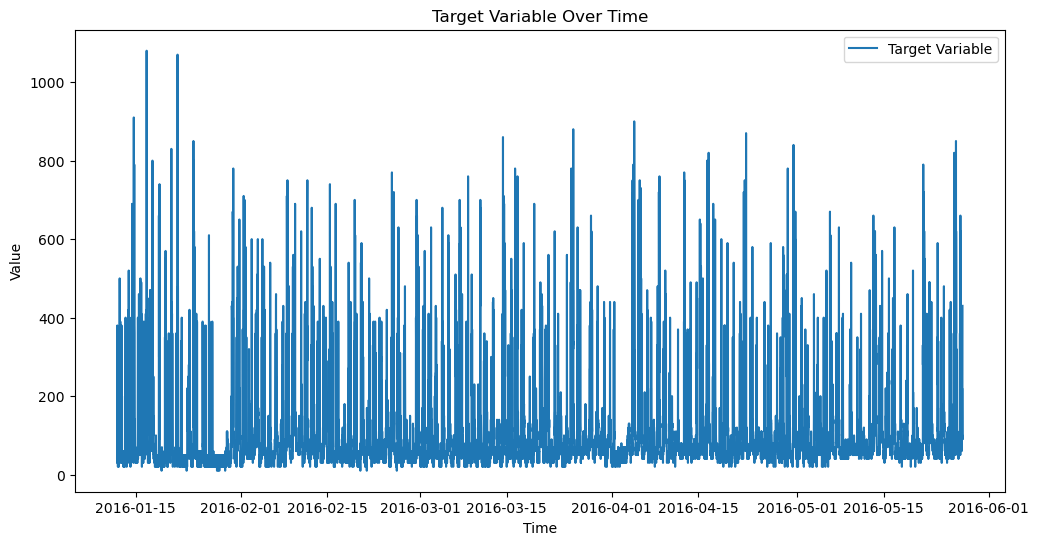

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(data['Appliances'], label='Target Variable')
plt.title('Target Variable Over Time')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

The data has very high frequency and too many measurements to visually inspect in a single plot. Therefore, I sample data for each day of the week for better visual inspection and confirm if there is a pattern or seasonality.  

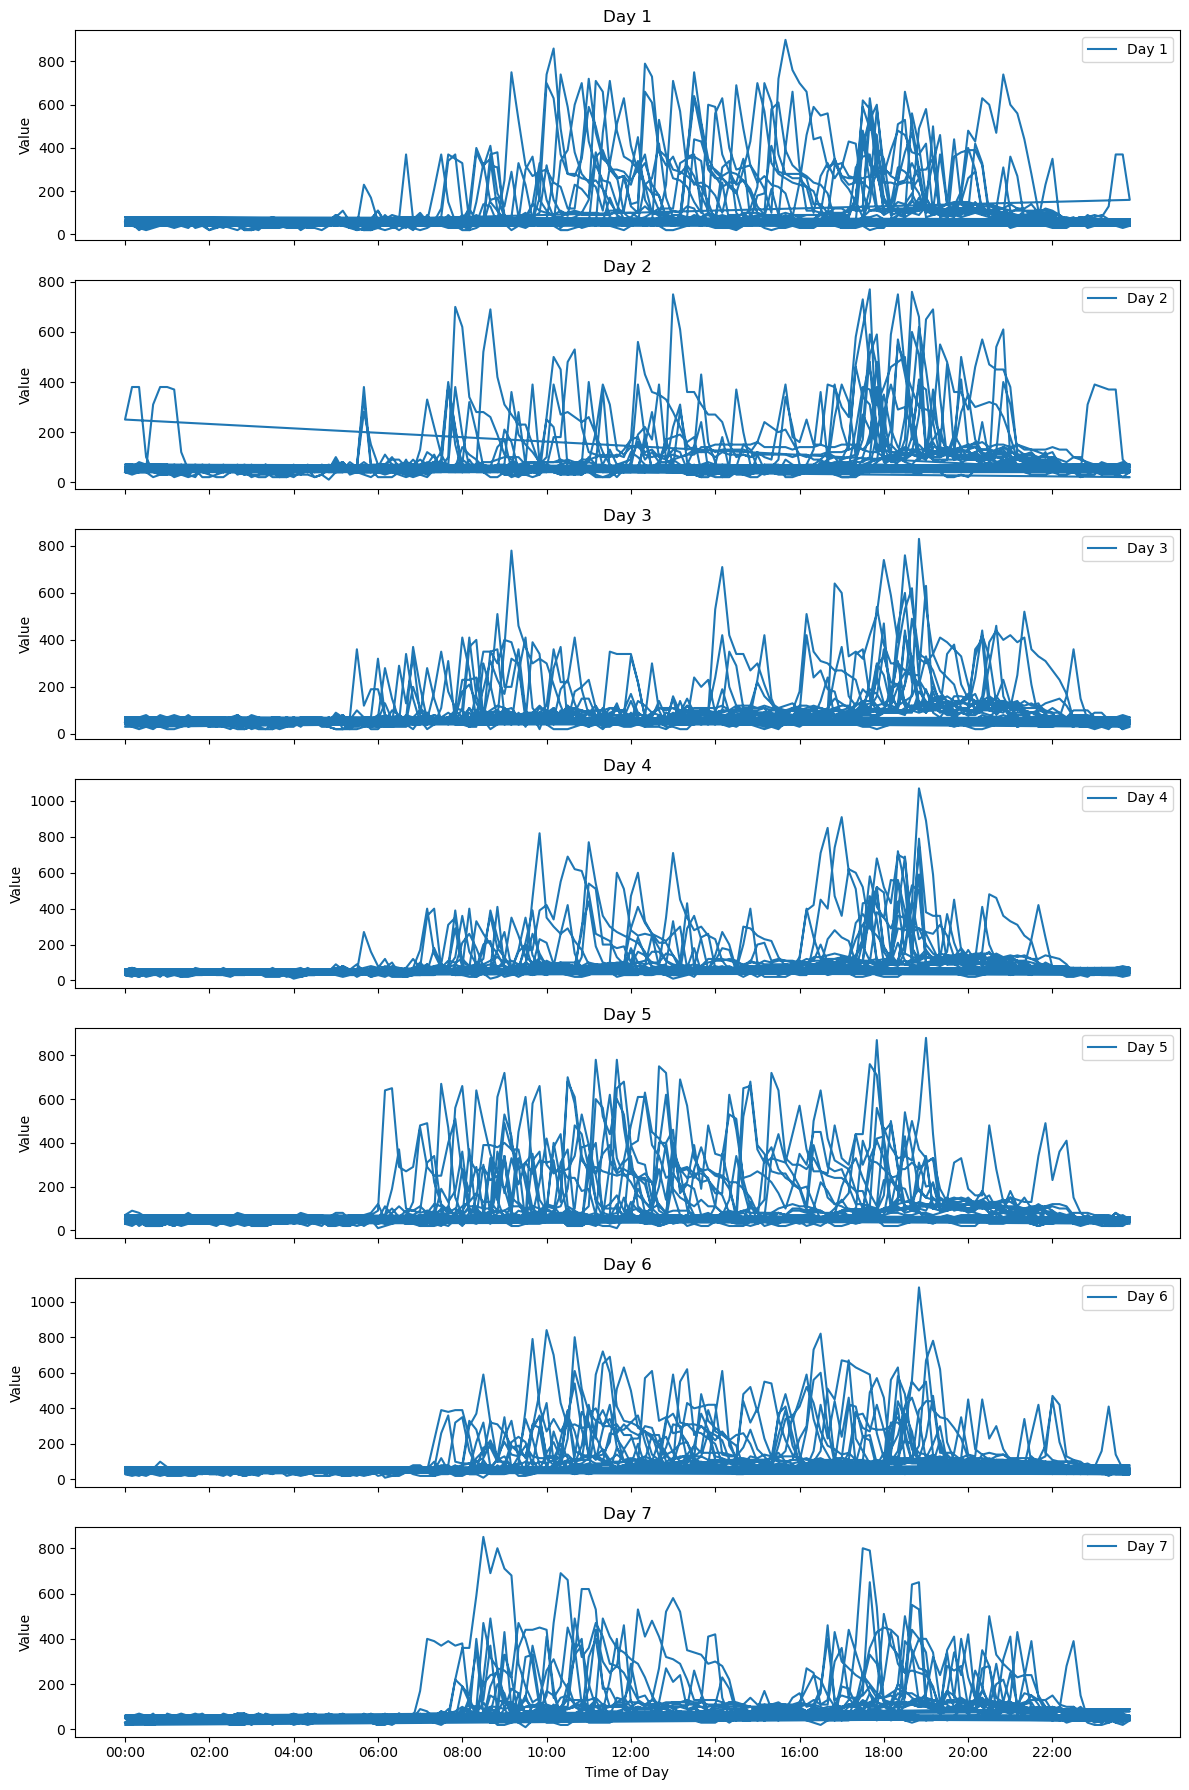

In [10]:
import matplotlib.dates as mdates

# Add 'Day of Week' and 'Time of Day' as numerical minutes since midnight
data['day_of_week'] = data.index.dayofweek  # 0 = Monday, 6 = Sunday
data['time_of_day'] = data.index.hour * 60 + data.index.minute  # Total minutes in a day

# Plot each day of the week separately
fig, axes = plt.subplots(7, 1, figsize=(12, 18), sharex=True)

for i in range(7):  # Loop through Monday (0) to Sunday (6)
    subset = data[data['day_of_week'] == i]
    axes[i].plot(subset['time_of_day'], subset['Appliances'], label=f'Day {i+1}')
    axes[i].set_title(f'Day {i+1}')
    axes[i].set_ylabel('Value')
    axes[i].set_xticks(np.arange(0, 1440, 120))  # Mark every 2 hours (120 minutes)
    axes[i].set_xticklabels([f'{h:02d}:00' for h in range(0, 24, 2)])  # Labels from 00:00 to 22:00
    axes[i].legend()

plt.xlabel('Time of Day')
plt.tight_layout()
plt.show()


**Daily Patterns:**
- We can see each day exhibits distinct cycles of consumption.

**Intraday Peaks:**
- Most days show low values early in the morning (before 6 AM) and spikes during daytime hours (8 AM–8 PM).
- Late evening dips (after 8 PM) are also noticeable.

**Day-to-Day Variations:**

- The patterns are not identical across days, indicating some variability.

**Baseline Energy Usage:**

- There is a fairly consistent baseline usage, suggesting continuous appliance usage like refrigerators.

## Rolling Statistics for Stationarity Check

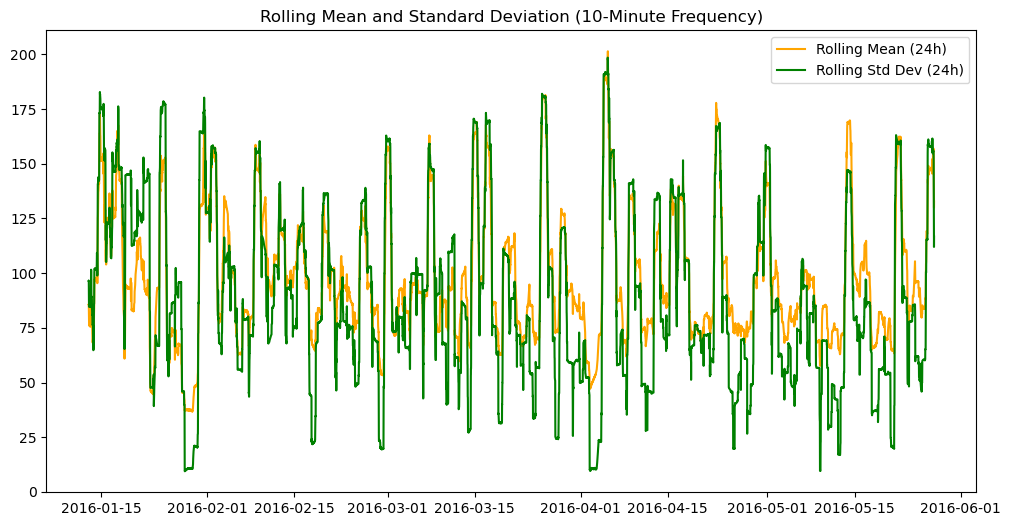

In [11]:
# Rolling mean and standard deviation
rolling_mean = data['Appliances'].rolling(window=144).mean()  # Approximately 24h (144 intervals)
rolling_std = data['Appliances'].rolling(window=144).std()

# Plot rolling statistics
plt.figure(figsize=(12, 6))
#plt.plot(data['Appliances'], label='Original (10-Minute)')
plt.plot(rolling_mean, label='Rolling Mean (24h)', color='orange')
plt.plot(rolling_std, label='Rolling Std Dev (24h)', color='green')
plt.title('Rolling Mean and Standard Deviation (10-Minute Frequency)')
plt.legend()
plt.show()


**Rolling Mean:**
- The mean usage fluctuates daily, but there is no upward or downward trend over time.
- This supports stationarity in terms of the mean, as the fluctuations appear cyclical rather than trending.

**Rolling Stdev:**
- The overall variability remains bounded, implying consistent patterns of volatility without abrupt changes—another indicator of stationarity.

## Correlation Analysis

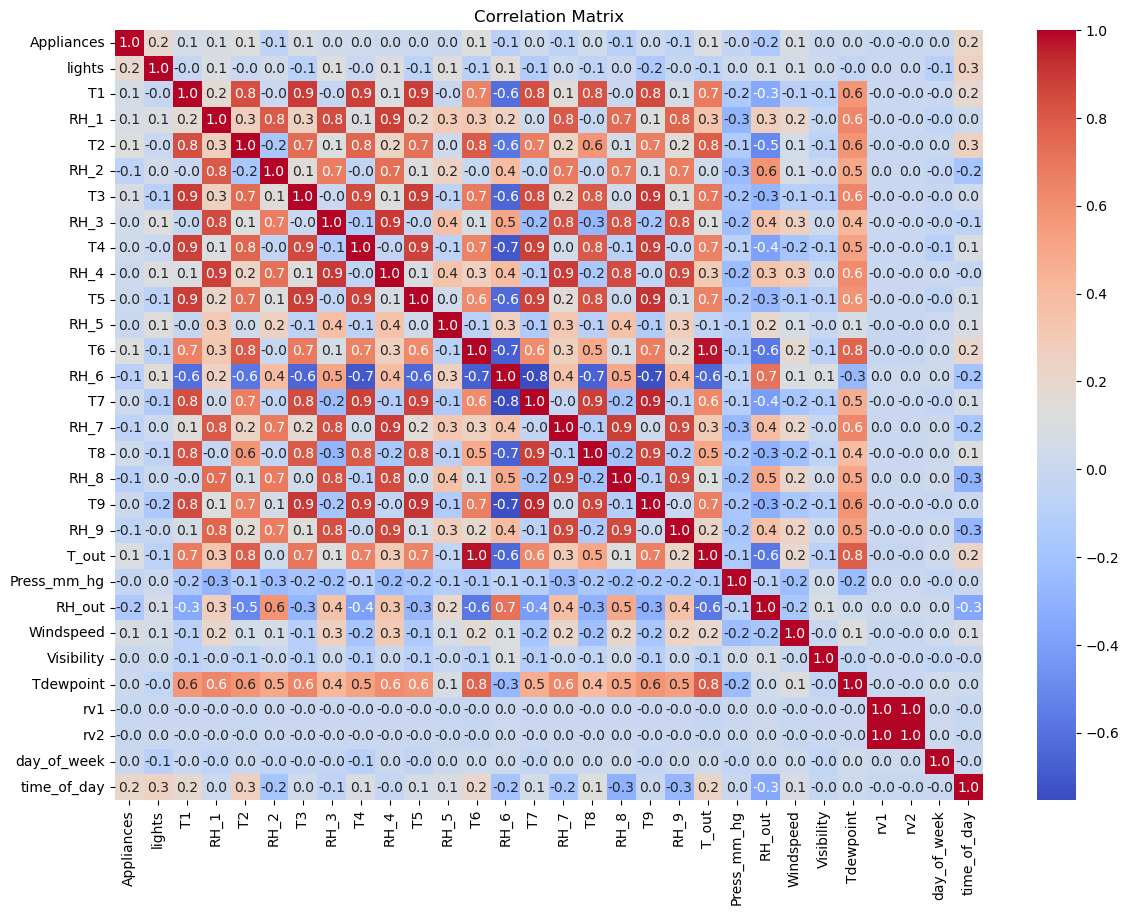

In [12]:
plt.figure(figsize=(14, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".1f")  # Display 1 decimal place
plt.title('Correlation Matrix')
plt.show()


- Most of the features have very low correlation with the target variable, therefore low prediction power.
- The temperature and humudity in the rooms are highly correlated. A risk for linear regression. 

## AutoCorrelation Function (ACF)

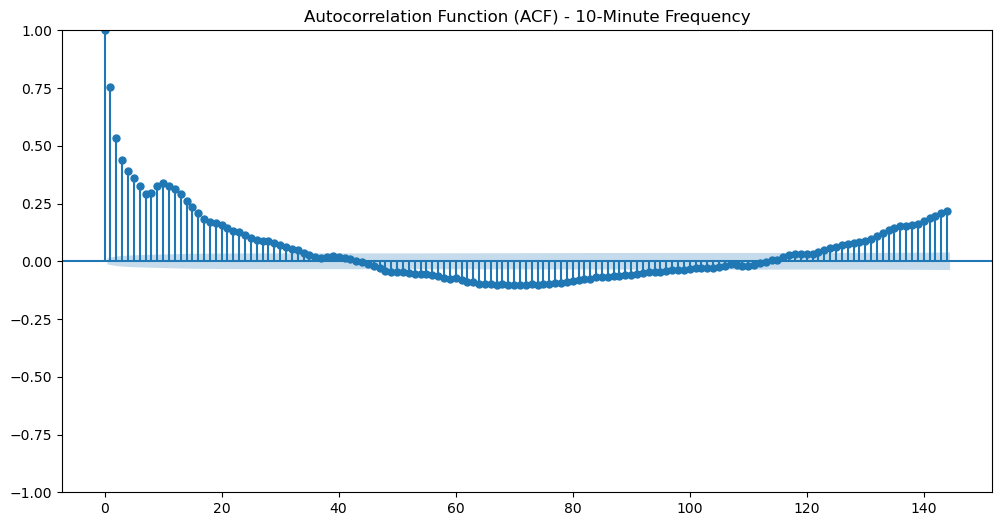

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF Plot
plt.figure(figsize=(12, 6))
plot_acf(data['Appliances'], lags=144, ax=plt.gca())  # 144 lags = 1 day (10-min intervals)
plt.title('Autocorrelation Function (ACF) - 10-Minute Frequency')
plt.show()


**AutoCorrelation:**

- Slow Decay (Initial Lags):
    - The ACF gradually decays rather than dropping off sharply.
    - This indicates the presence of a trend or long-term dependencies, suggesting non-stationarity in the raw data.

- Short-Term Positive Correlations:
    - The first 15–20 lags (~150–200 minutes) show significant positive autocorrelations, meaning values are influenced by their recent past.
    - This suggests the series has short-term persistence or memory, which is common for energy consumption data.

- Long-Term Seasonality (End of Plot):
    - Lags near 144 (1 day) show correlations rising again, hinting at daily seasonality.
    - This matches the earlier rolling statistics and weekly patterns we observed.

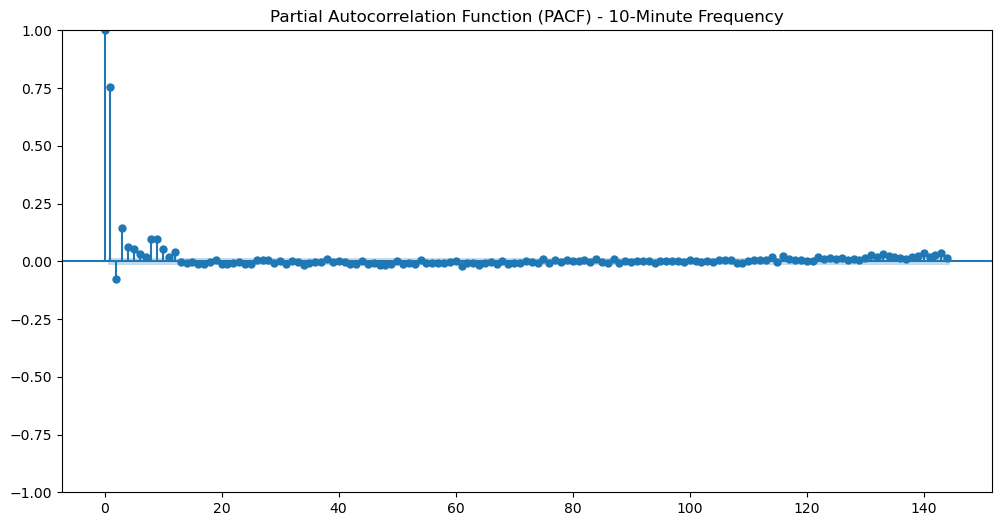

In [14]:
# PACF Plot
plt.figure(figsize=(12, 6))
plot_pacf(data['Appliances'], lags=144, ax=plt.gca())  # 144 lags = 24h
plt.title('Partial Autocorrelation Function (PACF) - 10-Minute Frequency')
plt.show()


**Partial Autocorrelation:**
- Gradual Decay After Lag 1:
    - After the first few lags, the partial correlations drop quickly and remain low.
    - This implies the series primarily depends on recent values (short lags), supporting a low-order AR model.

- No Seasonality in PACF:
    - Unlike the ACF plot, the PACF does not show significant peaks at 144 lags (1-day intervals).
    - This suggests that while the ACF reflects periodic patterns, these are likely due to moving averages (MA components) rather than autoregressive components (AR).

The usage demonstrates more of cyclical variations due to activity patterns within a day, not true seasonalaity like weekly/monthly.

Since there is not huge spikes in PACF, I can still model the data using short-term lags/dependencies such as MA, AR. 

## Aggregate Data  - Resample Hourly

The original data frequency - 10-minute- is too granular and prone to noise. To reduce the noise, simplify the dataset, and align more naturally with broader consumption patterns, I aggregate the data hourly. The hourly data matches real-world energy consumption analysis, which often considers hourly or daily trends and preferred over high-frequency measurements. 

In [15]:
# Resample data to hourly intervals
hourly_data = data.resample('h').mean().round(1)

# Verify the resampled data
print('Shape of Data:', hourly_data.shape)
print(hourly_data.head())

Shape of Data: (3283, 30)
                     Appliances  lights    T1  RH_1    T2  RH_2    T3  RH_3  \
date                                                                          
2016-01-12 00:00:00       141.7    16.7  21.3  45.0  20.6  44.0  20.1  45.5   
2016-01-12 01:00:00       168.3     8.3  21.0  45.6  20.3  44.3  20.1  45.5   
2016-01-12 02:00:00        45.0     0.0  20.7  46.2  20.1  44.5  20.2  45.5   
2016-01-12 03:00:00        35.0     0.0  20.5  46.2  19.8  44.6  20.2  45.4   
2016-01-12 04:00:00        45.0     0.0  20.2  46.5  19.6  44.7  20.3  45.5   

                       T4  RH_4  ...  T_out  Press_mm_hg  RH_out  Windspeed  \
date                             ...                                          
2016-01-12 00:00:00  20.5  47.1  ...    5.2        737.2    92.0        6.0   
2016-01-12 01:00:00  21.5  46.9  ...    5.1        737.8    92.0        5.6   
2016-01-12 02:00:00  21.1  45.9  ...    5.0        738.5    92.0        4.6   
2016-01-12 03:00:00  20.4

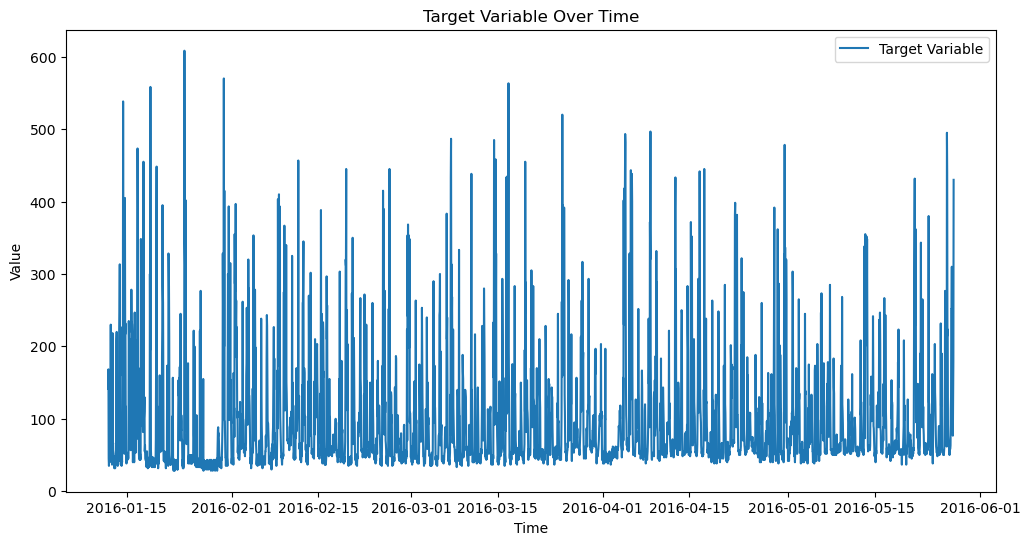

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(hourly_data['Appliances'], label='Target Variable')
plt.title('Target Variable Over Time')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

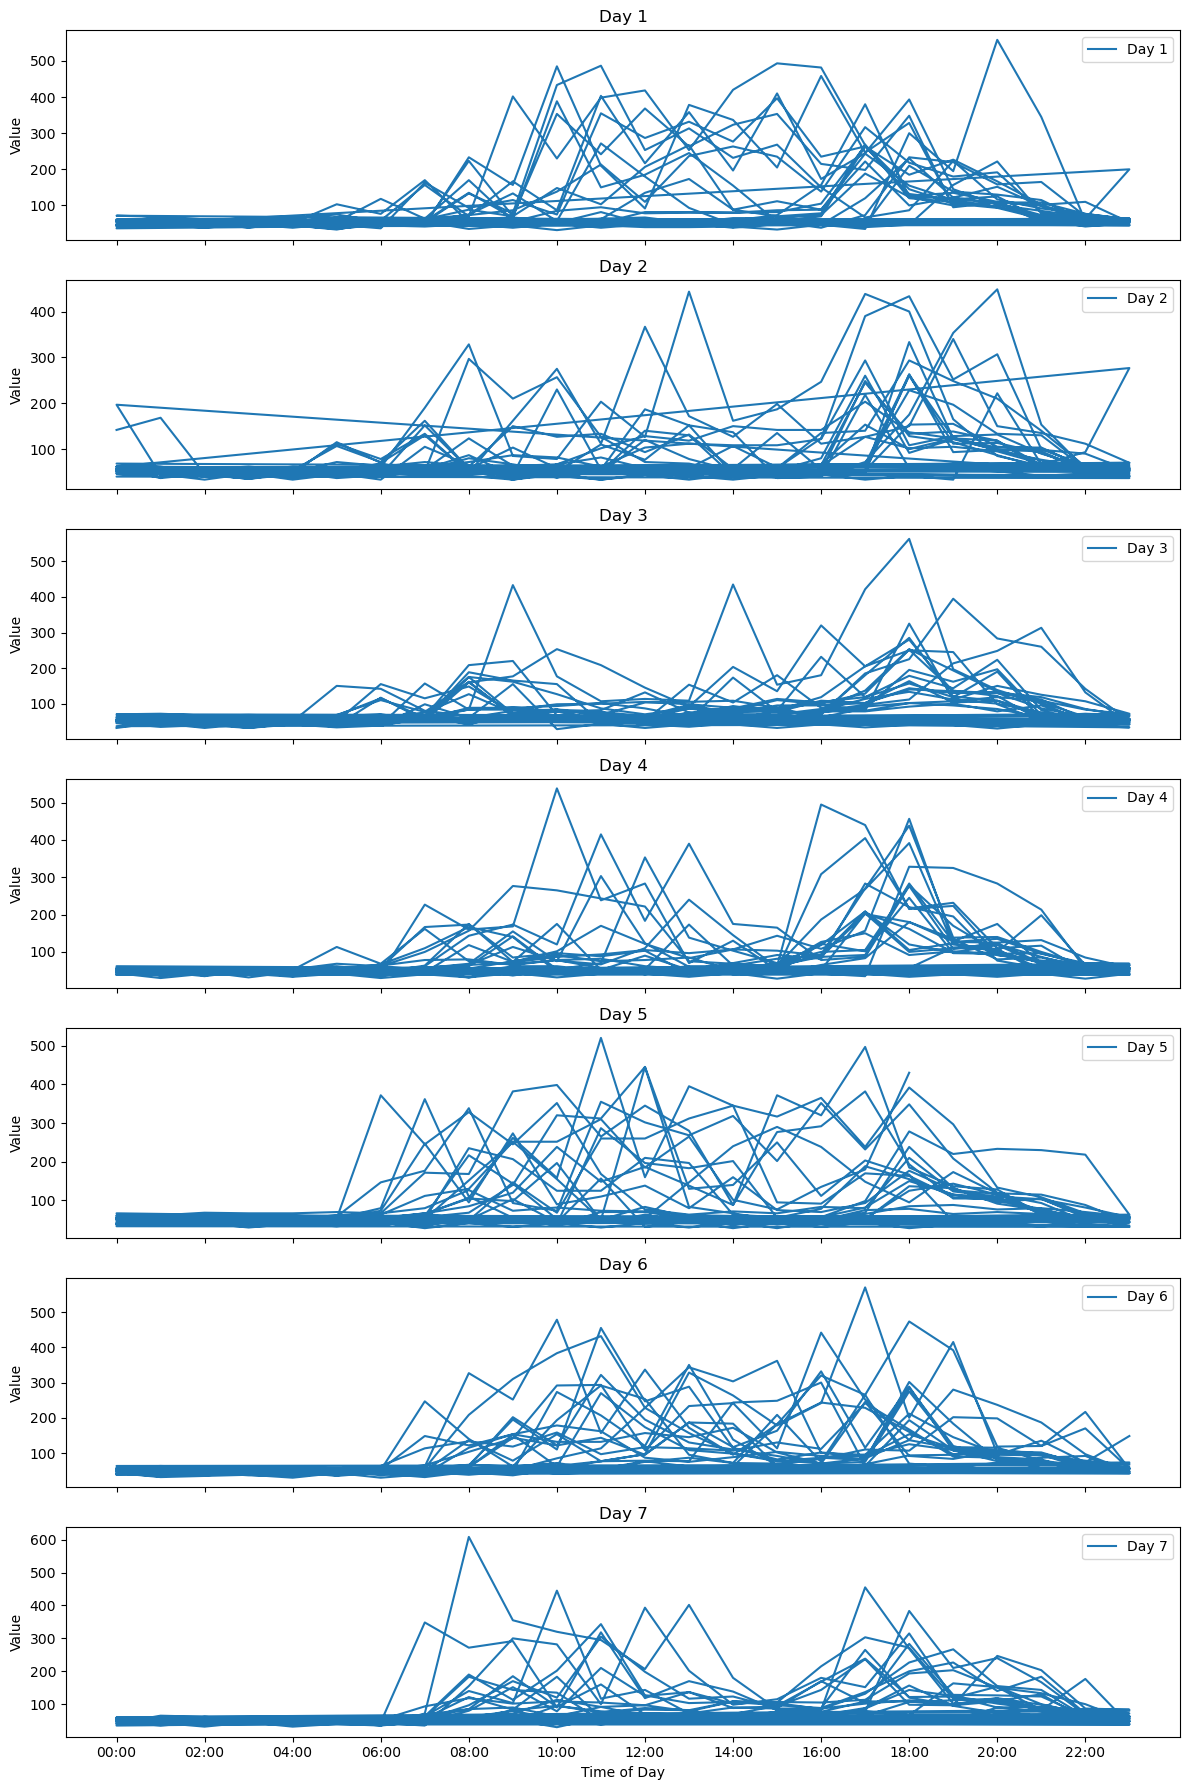

In [17]:
import matplotlib.dates as mdates

# Add 'Day of Week' and 'Time of Day' as numerical minutes since midnight
hourly_data['day_of_week'] = hourly_data.index.dayofweek  # 0 = Monday, 6 = Sunday
hourly_data['time_of_day'] = hourly_data.index.hour * 60 

# Plot each day of the week separately
fig, axes = plt.subplots(7, 1, figsize=(12, 18), sharex=True)

for i in range(7):  # Loop through Monday (0) to Sunday (6)
    subset = hourly_data[hourly_data['day_of_week'] == i]
    axes[i].plot(subset['time_of_day'], subset['Appliances'], label=f'Day {i+1}')
    axes[i].set_title(f'Day {i+1}')
    axes[i].set_ylabel('Value')
    axes[i].set_xticks(np.arange(0, 1440, 120))  # Mark every 2 hours (120 minutes)
    axes[i].set_xticklabels([f'{h:02d}:00' for h in range(0, 24, 2)])  # Labels from 00:00 to 22:00
    axes[i].legend()

plt.xlabel('Time of Day')
plt.tight_layout()
plt.show()

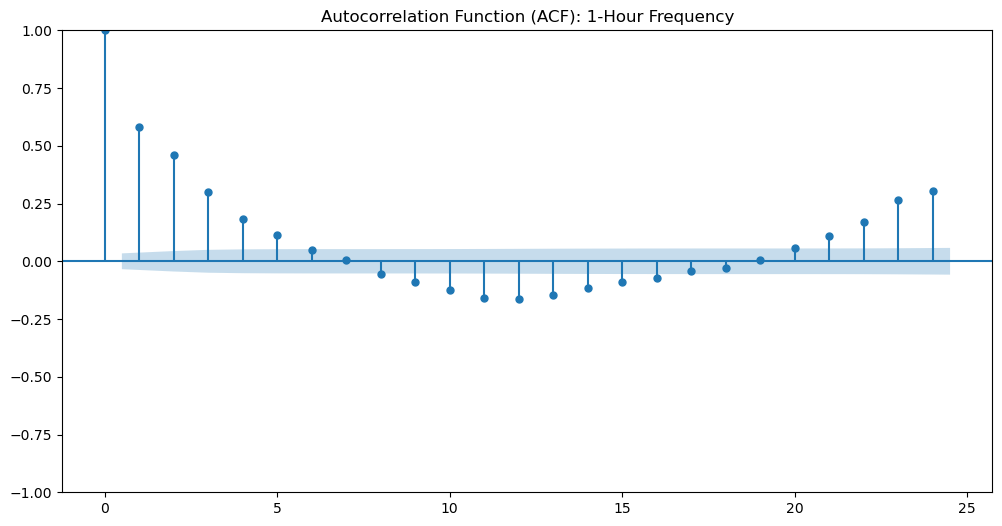

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF Plot
plt.figure(figsize=(12, 6))
plot_acf(hourly_data['Appliances'], lags=24, ax=plt.gca())  # 24 lags = 1 day (1-h intervals)
plt.title('Autocorrelation Function (ACF): 1-Hour Frequency')
plt.show()

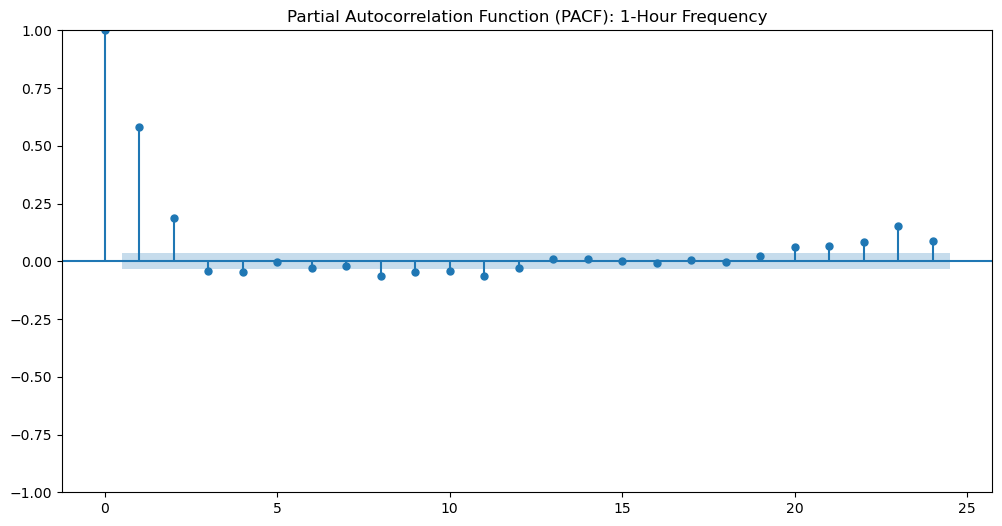

In [19]:
# PACF Plot
plt.figure(figsize=(12, 6))
plot_pacf(hourly_data['Appliances'], lags=24, ax=plt.gca())  # 24 lags = 24h
plt.title('Partial Autocorrelation Function (PACF): 1-Hour Frequency')
plt.show()

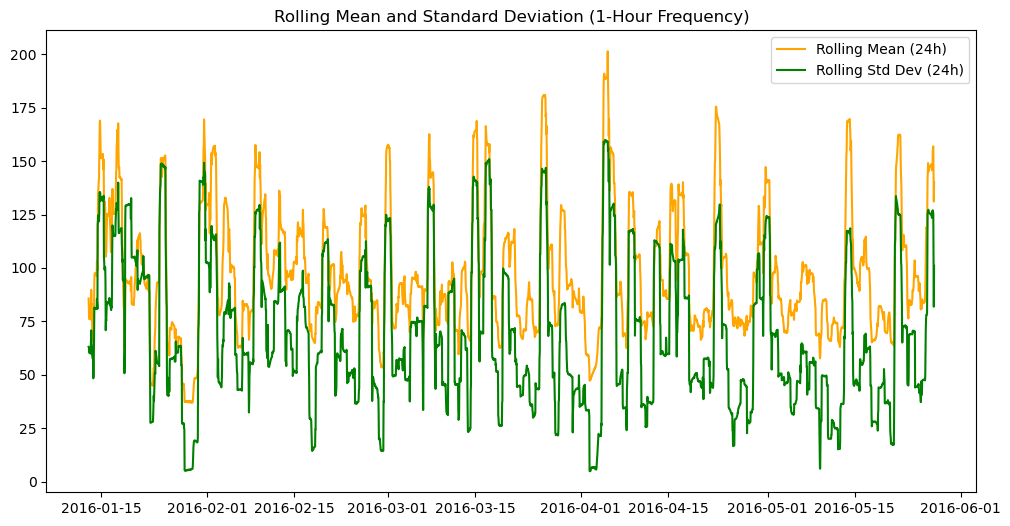

In [20]:
# Rolling mean and standard deviation
rolling_mean = hourly_data['Appliances'].rolling(window=24).mean()  # 24h
rolling_std = hourly_data['Appliances'].rolling(window=24).std()

# Plot rolling statistics
plt.figure(figsize=(12, 6))
plt.plot(rolling_mean, label='Rolling Mean (24h)', color='orange')
plt.plot(rolling_std, label='Rolling Std Dev (24h)', color='green')
plt.title('Rolling Mean and Standard Deviation (1-Hour Frequency)')
plt.legend()
plt.show()

## Feature Engineering

### Date/Time Features

In [21]:
# Time-based features
data['hour'] = data.index.hour               # Hour of the day (0–23)
data['day_of_week'] = data.index.dayofweek   # Day of the week (0 = Monday)
data['is_weekend'] = (data['day_of_week'] >= 5).astype(int)  # 1 if weekend, 0 otherwise

# Time-based features
hourly_data['hour'] = hourly_data.index.hour               # Hour of the day (0–23)
hourly_data['day_of_week'] = hourly_data.index.dayofweek   # Day of the week (0 = Monday)
hourly_data['is_weekend'] = (hourly_data['day_of_week'] >= 5).astype(int)  # 1 if weekend, 0 otherwise


## Stationarity Test ( Augmented Dickey-Fuller - ADF)

In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import STL

# Test for Stationarity using Augmented Dickey-Fuller (ADF) Test
result = adfuller(hourly_data['Appliances'])  

# Store results
adf_test_results = {
    'ADF Statistic': result[0],
    'p-value': result[1],
    'Critical Values': result[4]
}

adf_test_results

{'ADF Statistic': -8.94076949755287,
 'p-value': 9.266718640617363e-15,
 'Critical Values': {'1%': -3.432361825289355,
  '5%': -2.862428904196608,
  '10%': -2.567243182757641}}

- The hourly data is stationary (ADF stat is lower than critical values with very low p_value - significance) and therefore there is no need for differencing prior to modelling.  

## Seasonality

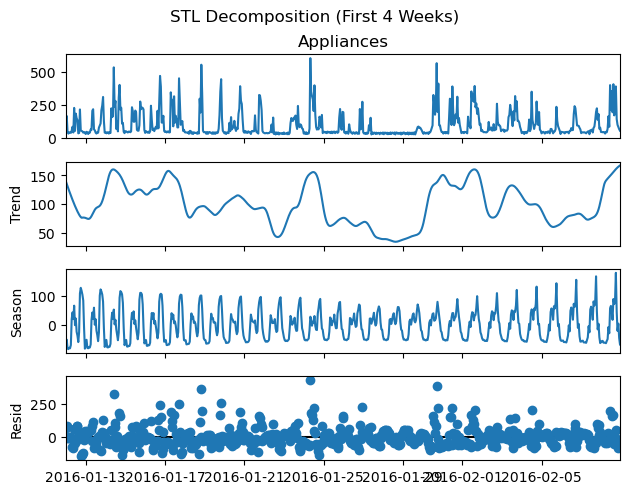

{'Trend Variance': 817.9686404871441,
 'Seasonal Variance': 2000.312896927217,
 'Residual Variance': 3357.144729312912}

In [23]:
from statsmodels.tsa.seasonal import STL

# Perform STL Decomposition
stl = STL(hourly_data['Appliances'], seasonal=25)  # Periodicity = 25 (hourly data, daily seasonality)
res = stl.fit()

# Plot for a subset of data 
data_4w = hourly_data.iloc[:672] # 4-weeks

# Perform STL Decomposition on the subset
stl_4w = STL(data_4w['Appliances'], seasonal=25)  # Using 25 for daily seasonality
res_4w = stl_4w.fit()

# Plot STL Components for the subset
res_4w.plot()
plt.suptitle('STL Decomposition (First 4 Weeks)', y=1.02)  # Add title
plt.show()

# Extract components for review
seasonal_component = res.seasonal
trend_component = res.trend
residual_component = res.resid

# Summarize components
summary = {
    "Trend Variance": trend_component.var(),
    "Seasonal Variance": seasonal_component.var(),
    "Residual Variance": residual_component.var()
}

summary

## Split and Save Processed Data

In [24]:
# Drop random variables
data = data.drop(['rv1', 'rv2'], axis=1)
hourly_data = hourly_data.drop(['rv1', 'rv2'], axis=1)

# Split the data
test_size = 144  # Extended to last 144 observations ~24h for testing instead of 100 to provide prediction for a whole day. 
train_size = len(data) - test_size
test_size_h = 120 # predict next 5-day consumption
train_size_h = len(hourly_data) - test_size_h

train, test = data.iloc[:train_size], data.iloc[train_size:]
print(f'Train size: {train.shape}, Test size: {test.shape}')

train_h, test_h = hourly_data.iloc[:train_size_h], hourly_data.iloc[train_size_h:]
print(f'Hourly Train size: {train_h.shape}, Hourly Test size: {test_h.shape}')


Train size: (19549, 30), Test size: (144, 30)
Hourly Train size: (3163, 30), Hourly Test size: (120, 30)


In [25]:
# Save processed data
processed_dir = '../data/processed/' 
data.to_csv(os.path.join(processed_dir, 'energydata_complete_processed.csv'), index=True)
# Save train and test datasets
train.to_csv(os.path.join(processed_dir, 'train.csv'), index=True)
test.to_csv(os.path.join(processed_dir, 'test.csv'), index=True)
train_h.to_csv(os.path.join(processed_dir, 'hourly_train.csv'), index=True)
test_h.to_csv(os.path.join(processed_dir, 'hourly_test.csv'), index=True)
print('Processed data saved at:', processed_dir)

Processed data saved at: ../data/processed/
